In [1]:
import pandas as pd
import json

with open('bif_data.json') as file:
    data = json.load(file)
rows = []
for main_key, platforms in data.items():
    for platform, platform_data in platforms.items():
        for identifier, measurements in platform_data.items():
            for measurement in measurements:
                row = {
                    'main_key': main_key,
                    'platform': platform,
                    'identifier': identifier,
                    'BiF': measurement[0],
                    'timestamp': measurement[1]
                }
                rows.append(row)
df = pd.DataFrame(rows)
df.to_csv('output.csv', index=False)

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
mydict = {}
count = 0
order = []
tokeep = set([('candidates-measurements-wget-50-200', 'amazon', '38106'),
             ('candidates-measurements-wget-50-200', 'spotify', '54720'),
             ('candidates-measurements-wget-50-200', 'youtube', '42964'),
             ('candidates-measurements-wget-50-200', 'tiktok', '48664'),
             ('candidates-measurements-wget-50-200', 'instagram', '47996'),
             ('candidates-measurements-wget-50-200', 'netflix', '43682'),
             ('candidates-measurements-wget-100-200', 'akamai-hulu', '41354'),
             ('candidates-measurements-wget-100-200', 'youtube', '56136'),
             ('candidates-measurements-wget-100-200', 'prime', '55058'),
             ('candidates-measurements-wget-100-200', 'zoom', '34388'),
             ('candidates-measurements-wget-100-200', 'disneyplus', '53752'),
             ('candidates-measurements-wget-100-200', 'hbo', '51966'),
             ('candidates-measurements-wget', 'spotify', '58000'),
             ('candidates-measurements-wget', 'google', '53250'),
             ('candidates-measurements-wget', 'discord', '59884'),
             ('candidates-measurements-wget', 'twitter', '36256'),
             ('candidates-measurements-wget', 'instagram', '58366'),
             ('candidates-measurements-wget', 'wikipedia', '51136'),
             ('control', 'cubic-0-50-1000-2', '32796'),
             ('control', 'bbr-0-50-1000-2', '52688'),
             ('control', 'reno-0-50-1000-2', '45358')])
# tokeep = set([('candidates-measurements-wget-100-200', 'akamai-hulu', '41354'),
#              ('candidates-measurements-wget-100-200', 'youtube', '56136'),
#              ('candidates-measurements-wget-100-200', 'prime', '55058'),
#              ('candidates-measurements-wget-100-200', 'zoom', '34388'),
#              ('candidates-measurements-wget-100-200', 'disneyplus', '53752'),
#              ('candidates-measurements-wget-100-200', 'hbo', '51966'),
#              ('control', 'cubic-0-50-1000-2', '32796'),
#              ('control', 'bbr-0-50-1000-2', '52688'),
#              ('control', 'reno-0-50-1000-2', '45358')])
# tokeep = set([('control', 'cubic-0-50-1000-2', '32796'),
#              ('control', 'bbr-0-50-1000-2', '52688'),
#              ('control', 'reno-0-50-1000-2', '45358')])
wgetdata = {}
controldata = {}
for index, row in df.iterrows():
    curtup = (row['main_key'],row['platform'], row['identifier'])
    newtup = (row['platform'],row['identifier'])
    # if curtup[0] == "candidates-measurements-wget-100-200":
    #     if newtup not in wgetdata:
    #         wgetdata[newtup] = []
    #     wgetdata[newtup].append((row['timestamp'],row['BiF']))
    if curtup[0] == "control":
        if newtup not in controldata:
            controldata[newtup] = []
        controldata[newtup].append((row['timestamp'],row['BiF']))
    else:
        if newtup not in wgetdata:
            wgetdata[newtup] = []
        wgetdata[newtup].append((row['timestamp'],row['BiF']))
        
    # if curtup not in mydict:
    #     order.append(curtup)
    #     mydict[curtup] = []
    # # mydict[curtup].append((row['timestamp'], row['BiF']))
    # mydict[curtup].append((row['BiF']))

In [4]:
print (controldata.keys())

dict_keys([('cubic-0-50-1000-2', '32796'), ('bbr-0-50-1000-2', '52688'), ('reno-0-50-1000-2', '45358')])


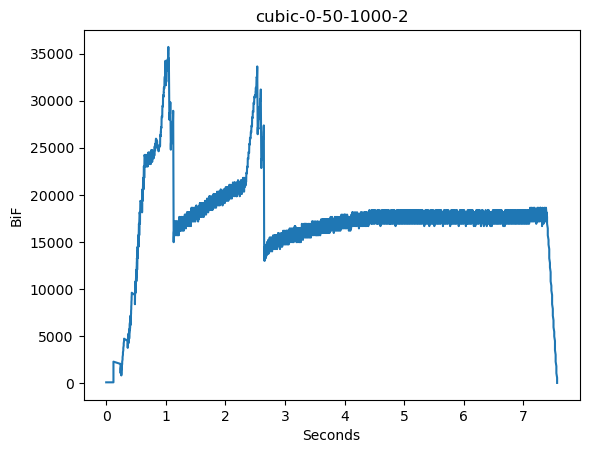

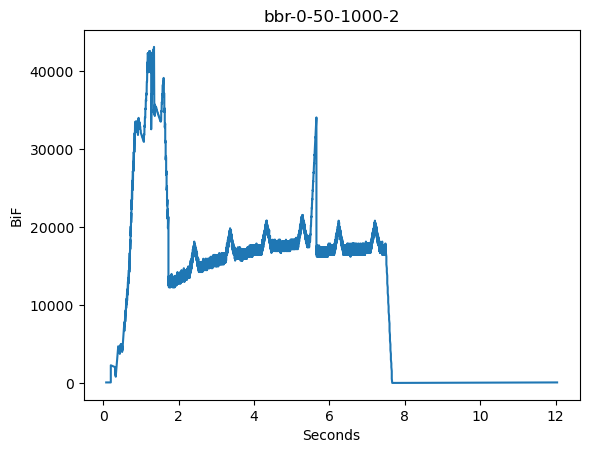

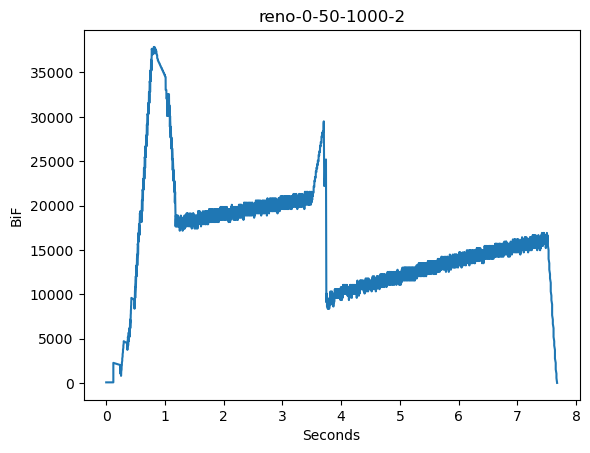

In [5]:
import matplotlib.pyplot as plt
# tosegment = [('instagram', '49732'), ('douyin', '39234'),
#               ('netflix', '60870'), ('zoom', '34388'), ('bilibili', '51246'),
#               ('wikipedia', '53692'), ('disneyplus', '53752'), 
#               ('pornhub', '34290'), ('meet', '57290')]
tosegment = [('cubic-0-50-1000-2', '32796'), ('bbr-0-50-1000-2', '52688'), ('reno-0-50-1000-2', '45358')]
for x in tosegment: 
    website = x[0]
    times = [t[0] for t in controldata[x]]
    bifs = [t[1] for t in controldata[x]]
    plt.plot(times,bifs)
    plt.ylabel("BiF")
    plt.xlabel("Seconds")
    plt.title(website)
    plt.show()

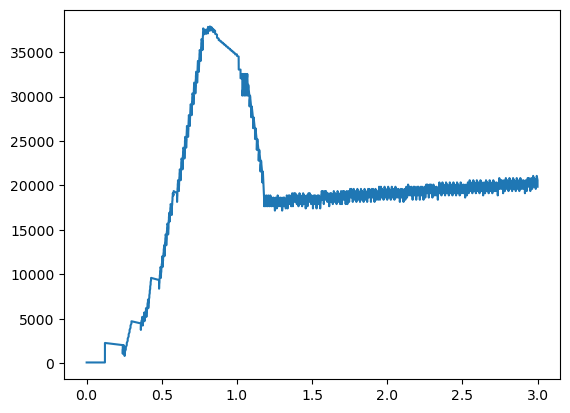

In [6]:
reno = ('reno-0-50-1000-2', '45358')
times = []
bifs = []
for t in controldata[reno]:
    if t[0] < 3:
        times.append(t[0])
        bifs.append(t[1])
    else:
        break
plt.plot(times,bifs)
plt.show()

In [7]:
# print (len(bifs))
while len(bifs)%50 != 0:
    bifs.pop()
print (len(bifs))
size = len(bifs)//50
p1 = 0
p2 = (len(bifs)//50) - 1
new_bif = []
while p1 < len(bifs) and p2 < len(bifs):
    new_bif.append(np.mean(bifs[p1:p2+1]))
    p1+=size
    p2+=size
print (len(new_bif))


1800
50


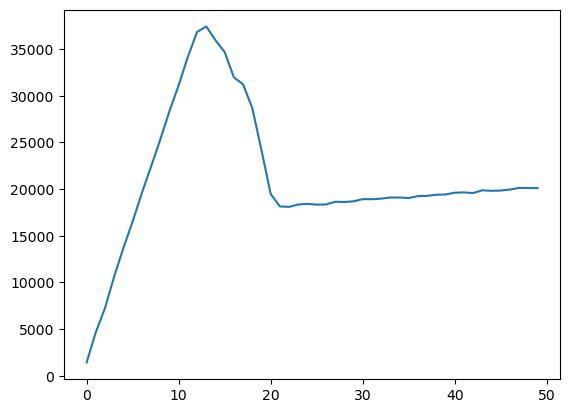

In [8]:
vals = [i for i in range (50)]
plt.plot(vals,new_bif)
plt.show()

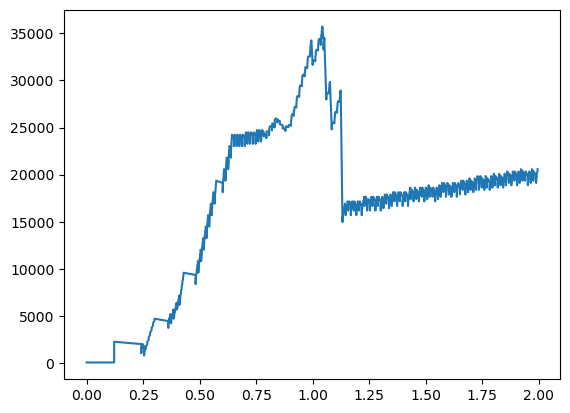

In [9]:
cubic = ('cubic-0-50-1000-2', '32796')
times = []
cubic_bif = []
for t in controldata[cubic]:
    if t[0] < 2:
        times.append(t[0])
        cubic_bif.append(t[1])
    else:
        break
plt.plot(times,cubic_bif)
plt.show()

In [10]:
while len(cubic_bif)%50 != 0:
    cubic_bif.pop()
print (len(cubic_bif))
size = len(cubic_bif)//50
p1 = 0
p2 = (len(cubic_bif)//50) - 1
new_bif_cubic = []
while p1 < len(cubic_bif) and p2 < len(cubic_bif):
    new_bif_cubic.append(np.mean(cubic_bif[p1:p2+1]))
    p1+=size
    p2+=size
print (len(new_bif_cubic))

1100
50


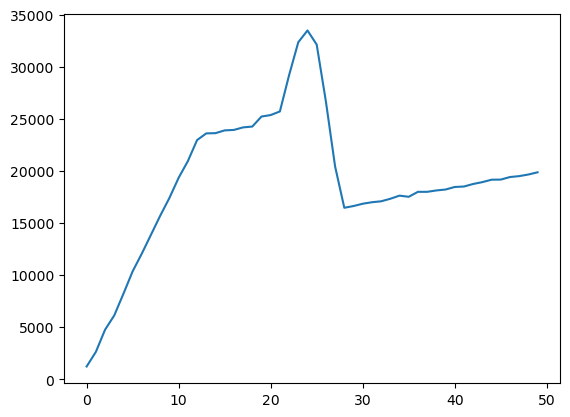

In [11]:
vals = [i for i in range (50)]
plt.plot(vals,new_bif_cubic)
plt.show()

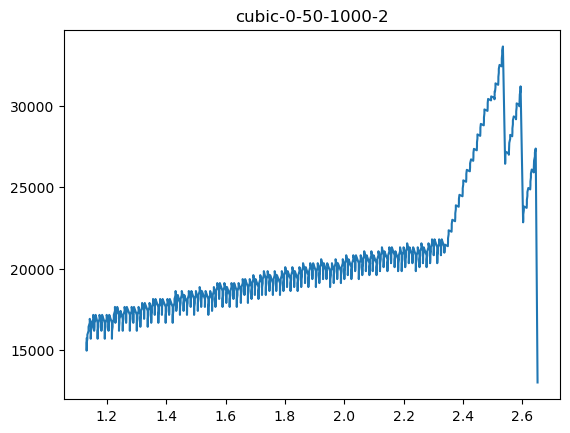

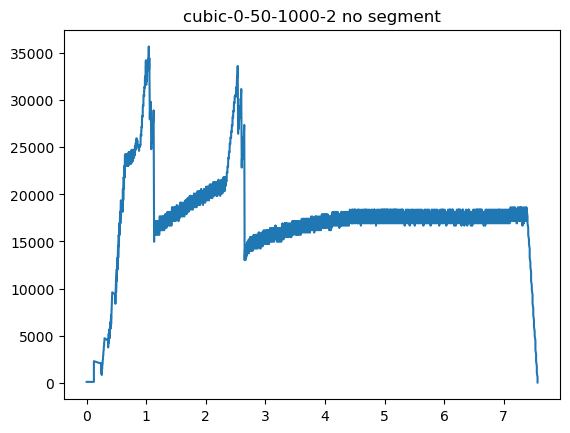

IS BBR


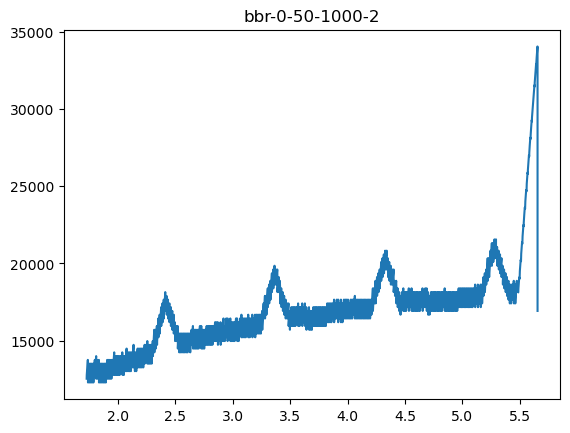

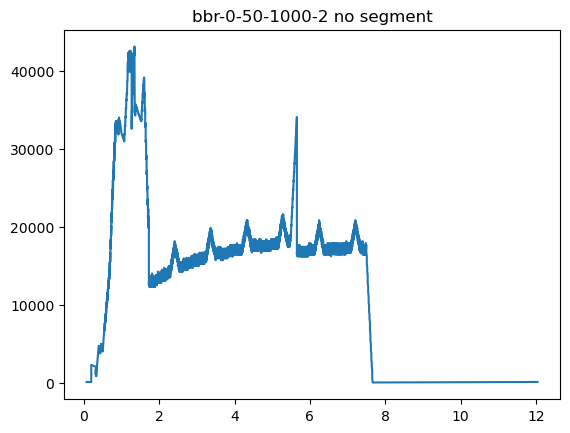

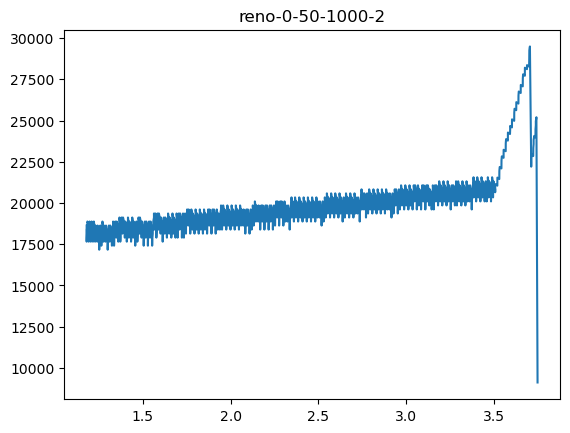

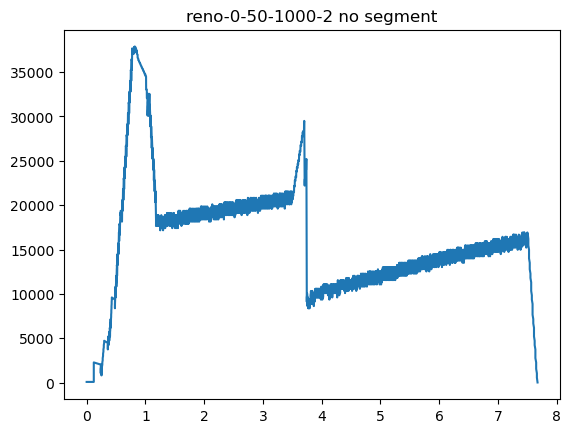

In [12]:
from scipy.signal import find_peaks, peak_prominences
rtt = 0.1
#find the maximum negative gradient, while we have negative gradients, iterate,
def getGrad(curtimeseries):
    rtt = 0.1
    times = [x[0] for x in curtimeseries]
    bifs = [x[1] for x in curtimeseries]
    grads = np.gradient(bifs)
    avg = np.mean([abs(x) for x in grads])
    time = None
    mingrad = float('inf')
    arr = []
    p1 = 0
    p2 = 0
    while p2 < len(times) and times[p2]-times[0] < rtt:
        p2+=1
    cur = 0
    for i in range (len(grads)):
        if abs(grads[i]) > 3*avg:
            arr.append((grads[i],times[i]))
        if grads[i] < mingrad:
            mingrad = grads[i]
            time = times[i]
            
    # temptime = times[:]
    # tempbifs = bifs[:]
    # while temptime and temptime[0] < time:
    #     temptime.pop(0)
    #     tempbifs.pop(0)
    # while tempbifs and tempbifs[0] < 0:
    #     tempbifs.pop(0)
    #     temptime.pop(0)
    # #now, get the segment until we see a very high increase in the gradient again
    # #time of 10 seconds
    # res = []
    # for i in range (len(tempbifs)):
    #     if temptime[i]-temptime[0] < 5:
    #         res.append([temptime[i],tempbifs[i]])
    #     else:
    #         break
    # return [mingrad,time,[],res]
    stack = []
    for i in range (len(arr)):
        while stack and arr[i][1]-stack[-1][1] < 1:
            stack.pop()
        stack.append(arr[i])
    #get all values in the timeseries that are between two intervals
    while len(stack) > 2:
        stack.pop()          
    if len(stack) < 2:
        return [mingrad,time,[],[]]
    res = []
    for i in range (len(times)):
        if stack[0][1] <= times[i]<=stack[1][1]:
            res.append([times[i],bifs[i]])
    return [mingrad,time,stack,res]

# tosegment = [('cubic-0-50-1000-2', '32796'), ('bbr-0-50-1000-2', '52688'), ('reno-0-50-1000-2', '45358')]
# tosegment = [('instagram', '49732'), ('douyin', '39234'),
#               ('netflix', '60870'), ('zoom', '34388'),
#               ('bilibili', '51246'), ('wikipedia', '53692'), 
#               ('disneyplus', '53752'), ('meet', '57290'),
#               ('cubic-0-50-1000-2', '32796'), ('bbr-0-50-1000-2', '52688'),
#               ('reno-0-50-1000-2', '45358')
#             ]
# tosegment = [('bbr-0-50-1000-2', '52688')]
def smooth_data(segment, rtt):
    times = [x[0] for x in segment]
    bifs = [x[1] for x in segment]
    p1 = 0
    p2 = min(len(segment),30)
    newbifs = []
    cursum = 0
    for i in range (p2):
        cursum+=bifs[i]
    while p1 < len(bifs) and p2 < len(bifs):
        cursum+=bifs[p2]
        newbifs.append(cursum/(p2-p1+1))
        cursum-=bifs[p1]
        p1+=1
        p2+=1
    times = times[:len(newbifs)]
    res = []
    for i in range (len(times)):
        res.append((times[i],newbifs[i]))
    return res
    
def classify_BBR(segment,rtt):
    #if we see a rate-based sender probe for bandwidth every 8 RTTs and backing off every 10 seconds, 
    #then it is BBR V1
    #increases sending rate by 25% every 8 RTTS
    newres = []
    curstack = []
    smoothed_seg = smooth_data(segment,0.2)
    smoothed_seg = smooth_data(smoothed_seg,0.2)
    times = [x[0] for x in smoothed_seg]
    bifs = [x[1] for x in smoothed_seg]
    if not bifs:
        # print ("Not enough data")
        return False
    peaks,_ = find_peaks(bifs, height = 1.4*bifs[0],width = min(3*rtt,len(bifs)-1))
    peak_time = [times[x] for x in peaks]
    grads = np.gradient(bifs)
    intervals = []
    thres = 2 #was 4 originnally
    for i in range (len(peaks)):
        index = peaks[i]
        p1 = peaks[i]-1
        p2 = peaks[i]+1
        # print (p1,p2, "HERE", peaks[i], peaks[p1])
        while p1 >= 0 and abs(grads[p1]-grads[index] <= thres):
            p1-=1
        while p2 < len(grads) and abs(grads[p2]-grads[index] <= thres):
            p2+=1
        # lslope = (bifs[index]-bifs[p1])/(times[index]-times[p1])
        # while p1 >= 0 and abs(lslope-((bifs[index]-bifs[p1])/(times[index]-times[p1]))) <= thres:
        #     print (lslope, (bifs[index]-bifs[p1])/(times[index]-times[p1]))
        #     p1-=1
        # rslope = (bifs[p2]-bifs[index])/(times[p2]-times[index])
        # while p2 < len(bifs) and abs(rslope-((bifs[p2]-bifs[index])/(times[p2]-times[index]))) <= thres:
        #     p2+=1
        intervals.append([max(0,p1),min(p2,len(times)-1)])
    time_intervals = []
    toplot = []
    for x in intervals:
        time_intervals.append([times[x[0]],times[x[1]]])
        toplot.append(times[x[0]])
        toplot.append(times[x[1]])
    # plt.plot(times,bifs)
    # plt.xticks(toplot)
    # plt.title("smoothed segment")
    # plt.show()
    cursum = 0
    count = 0
    for i in range (len(times)):
        flag = True
        for j in range (len(time_intervals)):
            if time_intervals[j][0] <= times[i] <= time_intervals[j][1]:
                flag = False
                break
        if flag:
            cursum+=bifs[i]
            count+=1
    avg_bif = cursum/count
    count = 0
    bbr_flag = False
    for i in range (len(peaks)):
        if bifs[peaks[i]] > avg_bif:
            count+=1
        if count >= 3:
            bbr_flag = True
            print ("IS BBR")
            break
    if not bbr_flag:
        return False
    return True
        

    # for i in range (len(peaks)):
    #     if not curstack:
    #         curstack.append(peaks[i])
    #         continue
    #     if times[peaks[i]]-times[curstack[-1]] <= 0.2:
    #         curstack.append(peaks[i])
    #     else:
    #         newres.append(curstack)
    #         curstack = []
    # avg = 0
    # # print (newres)
    # temp = []
    # for i in range (len(newres)):
    #     tt = [times[x] for x in newres[i]]
    #     temp.append(tt)
    # grads = np.gradient(bifs)
    # probs = 0
    # prevtime = times[0]
    # for i in range (len(smoothed_seg)):
    #     if times[i]-prevtime > 8*rtt:
    #         prevtime = times[i]
    #         probs = 0
    #         continue
        #check current gradient
        
for x in controldata: 
    website = x[0]
    curgrad, curtime,curarr,segment = getGrad(controldata[x])
    times = [t[0] for t in controldata[x]]
    bifs = [t[1] for t in controldata[x]]
    time_segment = [t[0] for t in segment]
    bif_segment = [t[1] for t in segment]
    # print (website)
    curflag = classify_BBR(segment,0.2)
    # curflag = classify_BBR(controldata[x], 0.2)
    # print (curflag, website)
    plt.plot(time_segment,bif_segment)
    plt.title(website)
    plt.show()
    plt.plot(times,bifs)
    plt.title(f'{website} no segment')
    plt.show()
    

IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR


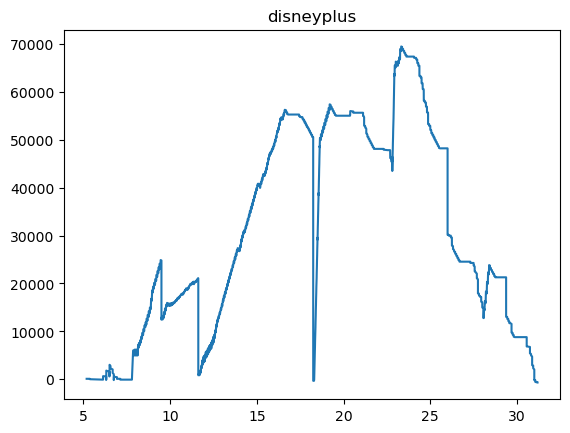

IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
IS BBR
77 37 {'xhamster', 'akamai-hulu', 'zoom', 'bilibili', 'appletv', 'meganz', 'disneyplus', 'meet', 'prime', 'tiktok', 'amazon', 'reddit', 'netflix', 'youtube', 'jiocinema', 'akamai-apple', 'pornhub', 'zhihu', 'applemusic', 'hulu', 'akamai-microsoft'}


In [30]:
wget_set = set([('candidates-measurements-wget-50-200', 'amazon', '38106'),
             ('candidates-measurements-wget-50-200', 'spotify', '54720'),
             ('candidates-measurements-wget-50-200', 'youtube', '42964'),
             ('candidates-measurements-wget-50-200', 'tiktok', '48664'),
             ('candidates-measurements-wget-50-200', 'instagram', '47996'),
             ('candidates-measurements-wget-50-200', 'netflix', '43682'),
             ('candidates-measurements-wget-100-200', 'akamai-hulu', '41354'),
             ('candidates-measurements-wget-100-200', 'youtube', '56136'),
             ('candidates-measurements-wget-100-200', 'prime', '55058'),
             ('candidates-measurements-wget-100-200', 'zoom', '34388'),
             ('candidates-measurements-wget-100-200', 'disneyplus', '53752'),
             ('candidates-measurements-wget-100-200', 'hbo', '51966'),
             ('candidates-measurements-wget', 'spotify', '58000'),
             ('candidates-measurements-wget', 'google', '53250'),
             ('candidates-measurements-wget', 'discord', '59884'),
             ('candidates-measurements-wget', 'twitter', '36256'),
             ('candidates-measurements-wget', 'instagram', '58366'),
             ('candidates-measurements-wget', 'wikipedia', '51136')])
flag = False
if flag:
    for x in wget_set:
        website = x[1]
        curtup = (x[1],x[2])
        curgrad, curtime,curarr,segment = getGrad(wgetdata[curtup])
        times = [t[0] for t in wgetdata[curtup]]
        bifs = [t[1] for t in wgetdata[curtup]]
        if not segment:
            print ("Not enough data")
            plt.plot(times,bifs)
            plt.title(website)
            plt.show()
            continue
        time_segment = [t[0] for t in segment]
        bif_segment = [t[1] for t in segment]
        # print (website)
        curflag = classify_BBR(segment,0.2)
        print (curflag, website)
        plt.plot(time_segment,bif_segment)
        plt.title(website)
        plt.show()
totalcount = 0
bbrcount = 0
bbr_sites = set()
for x in wgetdata:
    website = x[0]
    curgrad,curtime,curarr,segment = getGrad(wgetdata[x])
    times = [t[0] for t in wgetdata[x]]
    bifs = [t[1] for t in wgetdata[x]]
    if not segment:
        continue
    time_segment = [t[0] for t in segment]
    bif_segment = [t[1] for t in segment]
    # curflag = classify_BBR(segment, 0.1)
    curflag = classify_BBR(wgetdata[x],0.1)
    # curflag = True
    names = set(["appletv","youtube","prime","pornhub","netflix","applemusic"])
    # curflag = True
    totalcount+=1
    if curflag:
        bbrcount+=1
        bbr_sites.add(website)
        if 'disneyplus' in website:
            plt.plot(times,bifs)
            plt.title(website)
            plt.show()
        # if website in names:
        # plt.plot(time_segment,bif_segment)
        # plt.title(website)
        # plt.show()
        # plt.plot(times,bifs)
        # plt.title(f'{website} full trace')
        # plt.show()
print (totalcount, bbrcount, bbr_sites)

In [14]:
#MICHAEL GO FROM THIS STUFF DOWN

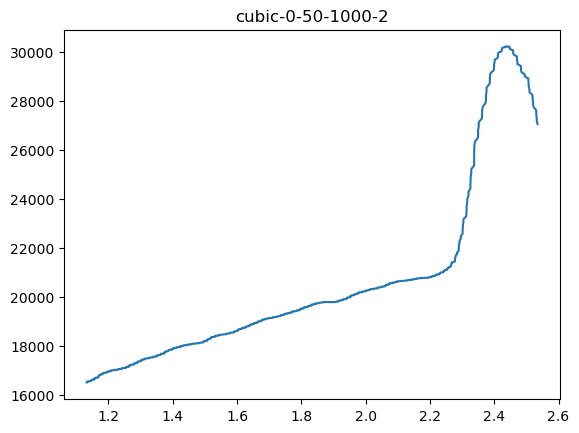

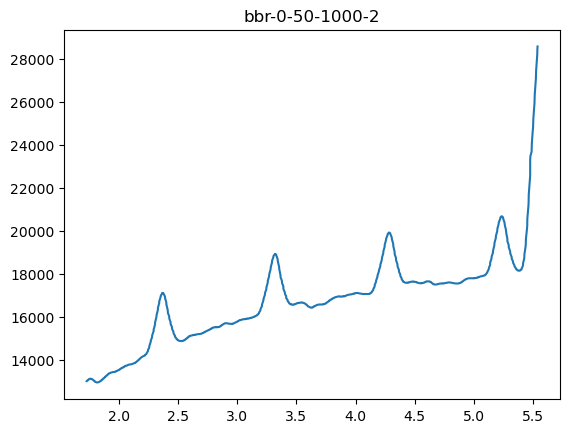

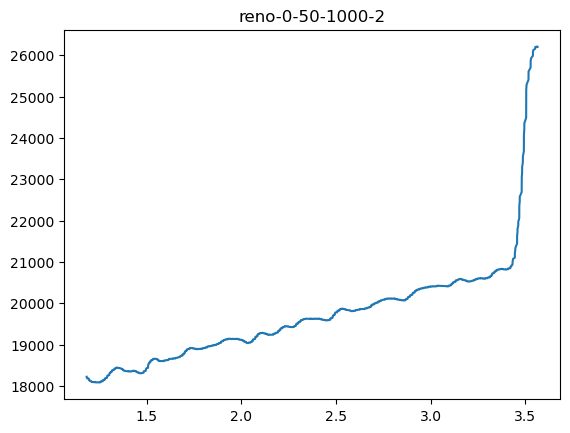

In [15]:
smooth_segment_wget = {}
smooth_segment_control = {}
#Each dict keyed by (website, number)
#smooth_segment_wget[(website,number)] = [(time0,bif0),(time1,bif1),...]
for x in controldata:
    website = x[0]
    curgrad,curtime,curarr,segment = getGrad(controldata[x])
    if not segment:
        continue
    smoothed_seg = smooth_data(segment,0.2)
    smoothed_seg = smooth_data(smoothed_seg,0.2)
    times = [x[0] for x in smoothed_seg]
    bifs = [x[1] for x in smoothed_seg]
    plt.plot(times,bifs)
    plt.title(website)
    plt.show()
    smooth_segment_control[x] = smoothed_seg
for x in wgetdata:
    website = x[0]
    curgrad,curtime,curarr,segment = getGrad(wgetdata[x])
    if not segment:
        continue
    smoothed_seg = smooth_data(segment,0.2)
    smoothed_seg = smooth_data(smoothed_seg,0.2)
    smooth_segment_wget[x] = smoothed_seg

In [16]:
#77 websites, 3 controls, ideally time series clustering with these 3 centroids could be good

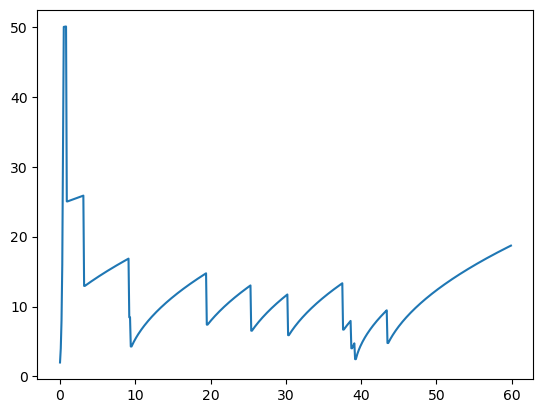

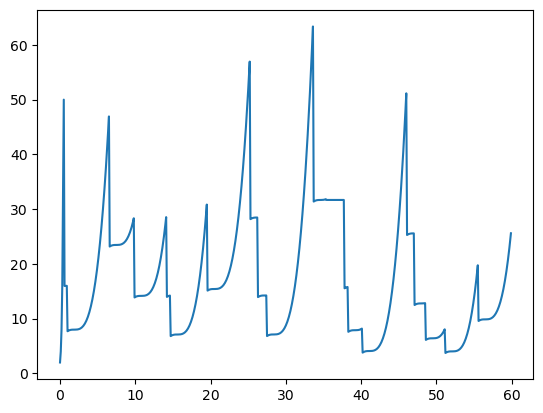

In [17]:
x = np.arange(0,60,0.1)
with open('new_reno.txt','r') as file:
    count = 0
    for line in file:
        cur_reno = line.split(',')
        cur_reno = [float(x) for x in cur_reno]
        if count > 10:
            break
        count+=1
        
with open('cubic.txt','r') as file:
    count = 0
    for line in file:
        cur_cubic = line.split(',')
        cur_cubic = [float(x) for x in cur_cubic]
        if count > 10:
            break
        count+=1
with open('hstcp.txt','r') as file:
    count = 0
    
plt.plot(x,cur_reno)
plt.show()
plt.plot(x,cur_cubic)
plt.show()

In [18]:
def getGrad(curtimeseries):
    times = [x[0] for x in curtimeseries]
    bifs = [x[1] for x in curtimeseries]
    grads = np.gradient(bifs)
    avg = np.mean([abs(x) for x in grads])
    time = None
    mingrad = float('inf')
    arr = []
    for i in range (len(grads)):
        if abs(grads[i]) > 5*avg:
            arr.append((grads[i],times[i]))
        if grads[i] < mingrad:
            mingrad = grads[i]
            time = times[i]
    stack = []
    for i in range (len(arr)):
        while stack and arr[i][1]-stack[-1][1] < 1:
            stack.pop()
        stack.append(arr[i])
    #get all values in the timeseries that are between two intervals
    while len(stack) > 2:
        stack.pop()          
    if len(stack) < 2:
        return [mingrad,time,[],[]]
    res = []
    for i in range (len(times)):
        if stack[0][1] <= times[i]<=stack[1][1]:
            res.append([times[i],bifs[i]])
    return [mingrad,time,stack,res]

reno_control = []
for i in range (len(cur_reno)):
    reno_control.append((x[i],cur_reno[i]))
cubic_control = []
for i in range (len(cur_cubic)):
    cubic_control.append((x[i],cur_cubic[i]))

In [19]:
r_grad,r_curtime,r_curarr,r_segment = getGrad(reno_control)
c_grad,c_curtime,c_curarr,c_segment = getGrad(cubic_control)

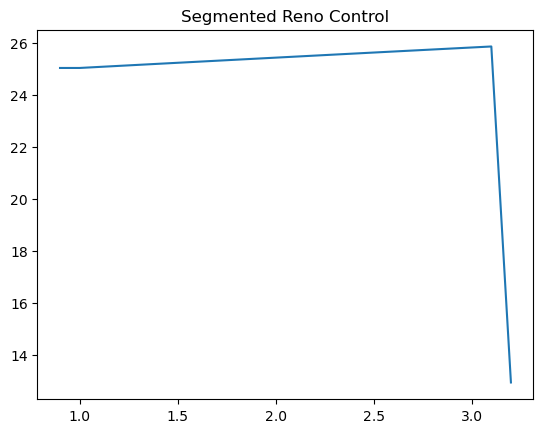

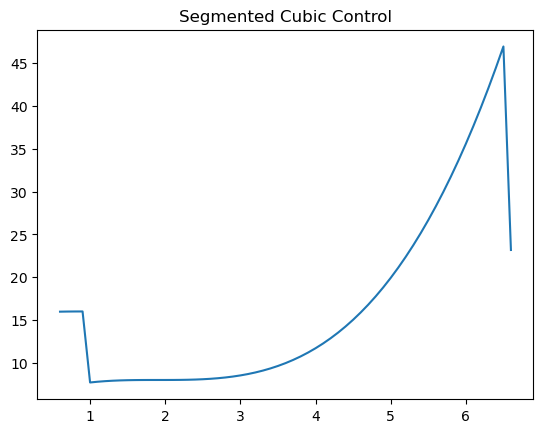

In [20]:
r_time = [c[0] for c in r_segment]
r_cwnd = [c[1] for c in r_segment]
c_time = [c[0] for c in c_segment]
c_cwnd = [c[1] for c in c_segment]
plt.plot(r_time,r_cwnd)
plt.title("Segmented Reno Control")
plt.show()
plt.plot(c_time,c_cwnd)
plt.title("Segmented Cubic Control")
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [22]:
# ndata = []
# for x in order:
#     ndata.append(mydict[x])
# time_series_dataset = to_time_series_dataset(ndata)

In [23]:
# print (len(time_series_dataset), len(ndata))

In [24]:
# scaler = TimeSeriesScalerMeanVariance()
# time_series_dataset_scaled = scaler.fit_transform(time_series_dataset)

# # Clustering using TimeSeriesKMeans with DTW metric
# model = TimeSeriesKMeans(n_clusters=3, max_iter=50, metric="dtw", random_state=0)

In [25]:
# labels = model.fit_predict(time_series_dataset_scaled)
# print (labels)

In [26]:
# print (order)

In [27]:
# dd = {}
# for i in range (len(labels)):
#     if labels[i] not in dd:
#         dd[labels[i]] = [order[i]]
#     else:
#         dd[labels[i]].append(order[i])

In [28]:
# print (dd)